<a href="https://colab.research.google.com/github/Josh0527/Uber-Stcok-Prediction-Model/blob/main/Stock_Prediction_Model_(Uber).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#import .csv file

import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/world-stock-prices-daily-updating")

print("Path to dataset files:", path)

100%|██████████| 11.8M/11.8M [00:00<00:00, 58.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/world-stock-prices-daily-updating/versions/249


In [8]:
#offload path into DF

from google.colab import files
uploaded = files.upload()

Saving World-Stock-Prices-Dataset.csv to World-Stock-Prices-Dataset.csv


In [9]:
df = pd.read_csv("World-Stock-Prices-Dataset.csv")

df.head() #read first 5 rows

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
0,2025-01-21 00:00:00-05:00,8.400000,8.540000,8.260000,8.440000,7491400.0,0.0,0.0,peloton,PTON,fitness,usa,NaN
1,2025-01-21 00:00:00-05:00,10.230000,10.280000,9.940000,9.980000,6427300.0,0.0,0.0,zoominfo,ZI,technology,usa,NaN
2,2025-01-21 00:00:00-05:00,126.019997,132.220001,125.660004,132.220001,72400.0,0.0,0.0,adidas,ADDYY,apparel,germany,NaN
3,2025-01-21 00:00:00-05:00,316.940002,319.700012,315.000000,317.950012,2778300.0,0.0,0.0,american express,AXP,finance,usa,NaN
4,2025-01-21 00:00:00-05:00,42.000000,42.400002,41.700001,41.700001,100.0,0.0,0.0,puma,PMMAF,apparel,germany,NaN


In [10]:
df.Brand_Name.unique()

array(['peloton', 'zoominfo', 'adidas', 'american express', 'puma',
       'visa', 'adobe', 'block', 'unilever', 'cisco',
       'jpmorgan chase & co', 'lvmh', 'airbnb', 'marriott', 'ubisoft',
       'toyota', 'amd', 'hilton', "mcdonald's", 'the home depot',
       'mastercard', 'johnson & johnson', 'uber', 'procter & gamble',
       'coinbase', 'fedex', '3m', 'nordstrom', 'philips', 'netflix',
       'the coca-cola company', 'foot locker', 'crocs',
       'southwest airlines', 'shopify', 'amazon', 'apple', 'nike',
       'target', 'google', 'spotify', 'zoom video communications',
       'the walt disney company', 'roblox', 'nintendo', 'delta air lines',
       'microsoft', 'costco', 'american eagle outfitters',
       'hershey company', 'tesla', 'pinterest', 'bmw group', 'chipotle',
       'porsche', 'logitech', 'colgate palmolive', 'salesforce / slack',
       'nvidia', 'starbucks', 'honda'], dtype=object)

In [11]:
df1 = df[['Date', 'Close', 'Brand_Name']]
df1.head(2)

,Date,Close,Brand_Name
0,2025-01-21 00:00:00-05:00,8.44,peloton
1,2025-01-21 00:00:00-05:00,9.98,zoominfo


In [12]:
df2 = df1[df1['Brand_Name'] == 'uber']

In [13]:
df2.head(2), df2.shape

(                          Date      Close Brand_Name
 22   2025-01-21 00:00:00-05:00  67.739998       uber
 107  2025-01-17 00:00:00-05:00  67.339996       uber,
 (1470, 3))

In [14]:
df3 = df2[['Date', 'Close']]
df3.tail(4)

,Date,Close
87714,2019-05-15 00:00:00-04:00,41.290001
87785,2019-05-14 00:00:00-04:00,39.959999
87847,2019-05-13 00:00:00-04:00,37.099998
87861,2019-05-10 00:00:00-04:00,41.570000


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 22 to 87861
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1470 non-null   object 
 1   Close   1470 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.5+ KB


In [16]:
#convert to local time
#convert to Datetime
import pytz

def str_to_dt(date):
    x = pd.to_datetime(date)  # Convert string to datetime
    if x.tzinfo is None:  # Check if naive (no timezone)
        x = x.tz_localize("UTC")  # Localize to UTC
    lagos_tz = pytz.timezone("Africa/Lagos")  # Define Lagos timezone
    return x.tz_convert(lagos_tz)  # Convert to Lagos time

#check
date_str = "2024-01-29 12:00:00"
converted_date = str_to_dt(date_str)
print(converted_date)

2024-01-29 13:00:00+01:00


In [17]:
df3['Date'] = df3['Date'].apply(str_to_dt)
df3['Date']

<ipython-input-17-780caa04f61e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date'] = df3['Date'].apply(str_to_dt)


,Date
22,2025-01-21 06:00:00+01:00
107,2025-01-17 06:00:00+01:00
140,2025-01-17 06:00:00+01:00
231,2025-01-16 06:00:00+01:00
261,2025-01-15 06:00:00+01:00
...,...
87643,2019-05-16 05:00:00+01:00
87714,2019-05-15 05:00:00+01:00
87785,2019-05-14 05:00:00+01:00
87847,2019-05-13 05:00:00+01:00


In [18]:
df3['Date'] = pd.to_datetime(df3['Date']).dt.date
df3.Date

<ipython-input-18-f560158b9a97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date'] = pd.to_datetime(df3['Date']).dt.date


,Date
22,2025-01-21
107,2025-01-17
140,2025-01-17
231,2025-01-16
261,2025-01-15
...,...
87643,2019-05-16
87714,2019-05-15
87785,2019-05-14
87847,2019-05-13


In [19]:
df3.index = df3.pop('Date')
df3.head(2)

,Close
Date,
2025-01-21,67.739998
2025-01-17,67.339996


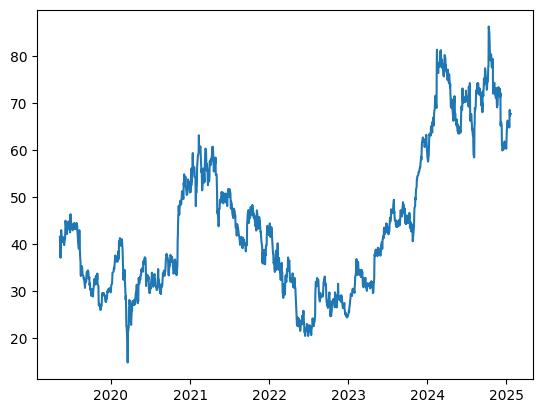

In [20]:
#plot time-series

import matplotlib.pyplot as plt

plt.plot(df3.index, df3['Close'])